# Análise Preditiva da Aprovação de Alunos

Esse é o meu primeiro projeto de Machine Learning, implementado com a biblioteca [PyCaret](https://github.com/pycaret/pycaret/tree/master). Nele, foi analisado o dataset [Student Exam Performance Prediction](https://www.kaggle.com/datasets/mrsimple07/student-exam-performance-prediction) para avaliar se o(a) aluno(a) foi aprovado(a)/reprovado(a) com base em suas horas de estudo e na nota obtida na avaliação anterior. Após uma breve análise, o modelo escolhido foi o de **árvore de decisão**.

No final do notebook, foram apresentadas as **Conclusões** do estudo.

In [127]:
!pip install pycaret


In [128]:
import pandas as pd

In [129]:
df = pd.read_csv('student_exam_data.csv')

In [130]:
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


## Machine Learning - escolha e implementação do modelo


In [132]:
from pycaret.classification import *

In [133]:
dados = df.sample(frac=0.90, random_state=546)
dados_nao_vistos = df.drop(dados.index)
dados.reset_index(inplace=True, drop=True)
dados_nao_vistos.reset_index(inplace=True, drop=True)

In [134]:
dados.shape

(450, 3)

In [135]:
dados_nao_vistos.shape

(50, 3)

In [136]:
pipeline = setup(data=dados, target='Pass/Fail', session_id='400')

,Description,Value
0,Session id,400
1,Target,Pass/Fail
2,Target type,Binary
3,Original data shape,"(450, 3)"
4,Transformed data shape,"(450, 3)"
5,Transformed train set shape,"(315, 3)"
6,Transformed test set shape,"(135, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [137]:
melhor_modelo = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0560
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4760
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2520
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1800
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3680
xgboost,Extreme Gradient Boosting,0.9968,0.9939,0.9913,1.0000,0.9956,0.9931,0.9932,0.1500
lightgbm,Light Gradient Boosting Machine,0.9905,0.9996,0.9913,0.9840,0.9872,0.9796,0.9802,0.2740
knn,K Neighbors Classifier,0.9778,0.9984,0.9826,0.9599,0.9704,0.9526,0.9538,0.0900
qda,Quadratic Discriminant Analysis,0.9397,0.9896,0.8609,0.9719,0.9120,0.8664,0.8711,0.0760
nb,Naive Bayes,0.9365,0.9935,0.8261,1.0000,0.9045,0.8576,0.8666,0.0520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [138]:
# modelos
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [139]:
modelo_dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [140]:
modelo_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=400, splitter='best')

In [141]:
modelo_final = finalize_model(modelo_dt)

In [142]:
modelo_final

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Study Hours',
                                             'Previous Exam Score'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=No...
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        random_state=400, splitter='best'))],
         verbose=False)

In [143]:
# predizendo com o conjunto de dados que nao foi utilizado
predict_model(modelo_final, data=dados_nao_vistos)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Study Hours,Previous Exam Score,Pass/Fail,prediction_label,prediction_score
0,2.404168,81.083870,0,0,1.0
1,7.372653,83.543167,1,1,1.0
2,2.636425,42.713120,0,0,1.0
3,2.255445,62.853451,0,0,1.0
4,1.585464,99.798210,0,0,1.0
5,3.741524,90.978844,0,0,1.0
6,7.158097,67.032646,1,1,1.0
7,9.726262,71.209808,1,1,1.0
8,7.976195,91.130890,1,1,1.0
9,2.763846,41.726959,0,0,1.0


## Visualização dos Dados


Text(0.5, 1.0, 'Horas de Estudo por Resultado de Aprovação')

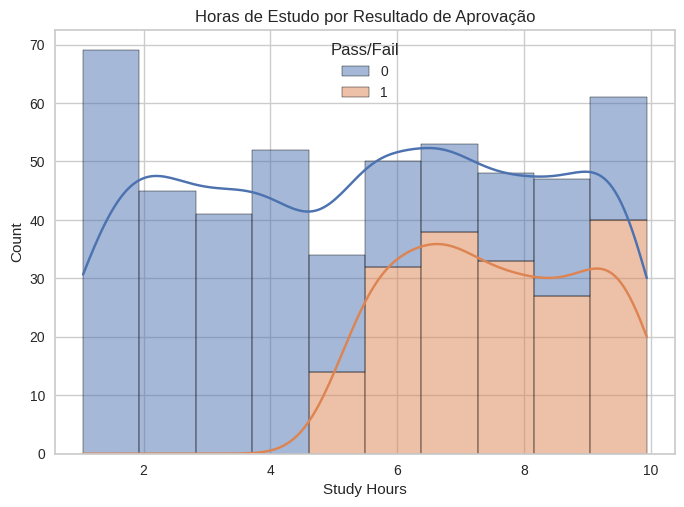

In [144]:

import matplotlib.pyplot as plt
import seaborn as sns

grafico = sns.histplot(data=df, x='Study Hours', hue='Pass/Fail',  multiple="stack", palette='deep', kde=True)
plt.title('Horas de Estudo por Resultado de Aprovação')

Text(0.5, 1.0, 'Aprovações em Relação a Primeira Nota Obtida')

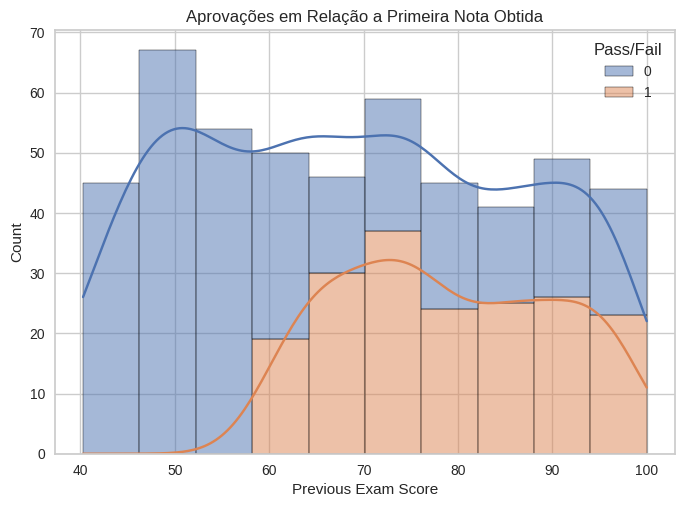

In [145]:
sns.histplot(data=df, x='Previous Exam Score', hue='Pass/Fail',  multiple="stack", palette='deep', kde=True)
plt.title('Aprovações em Relação a Primeira Nota Obtida')

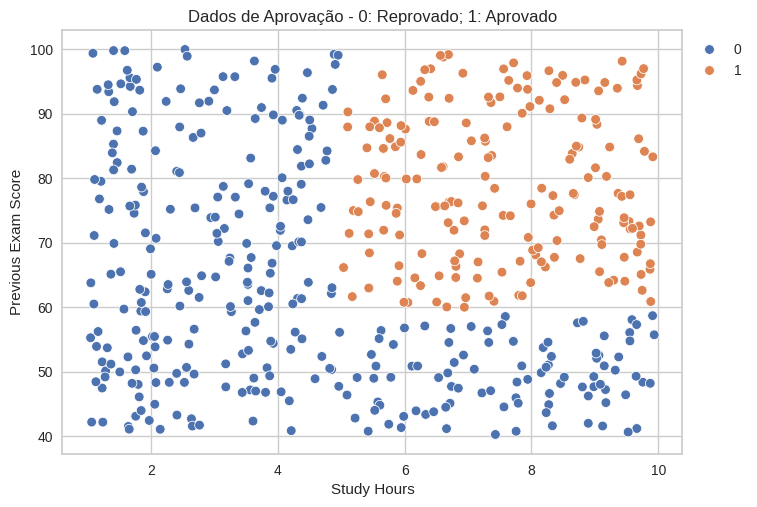

In [146]:
grafico = sns.scatterplot(data=df, x='Study Hours', y='Previous Exam Score', palette='deep', hue='Pass/Fail', legend='auto')
plt.title('Dados de Aprovação - 0: Reprovado; 1: Aprovado')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

<Axes: xlabel='Pass/Fail', ylabel='Count'>

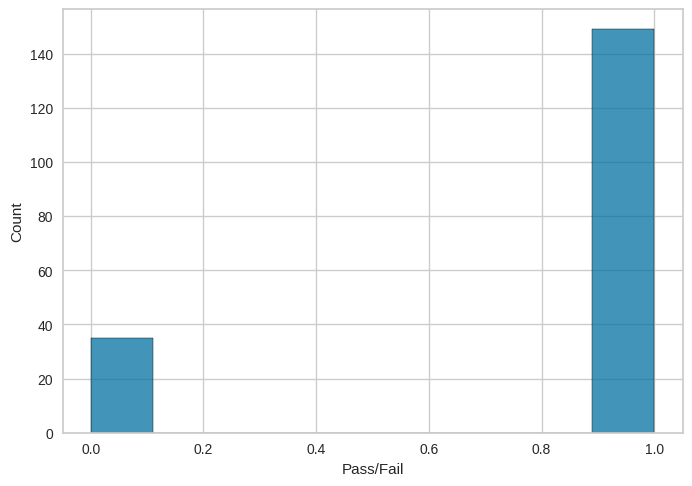

In [147]:
tempo = df[df['Study Hours'] > 6]
nota = tempo[tempo['Previous Exam Score'] > 50]

sns.histplot(data = nota, x='Pass/Fail', palette='deep')

<Axes: xlabel='Pass/Fail', ylabel='Count'>

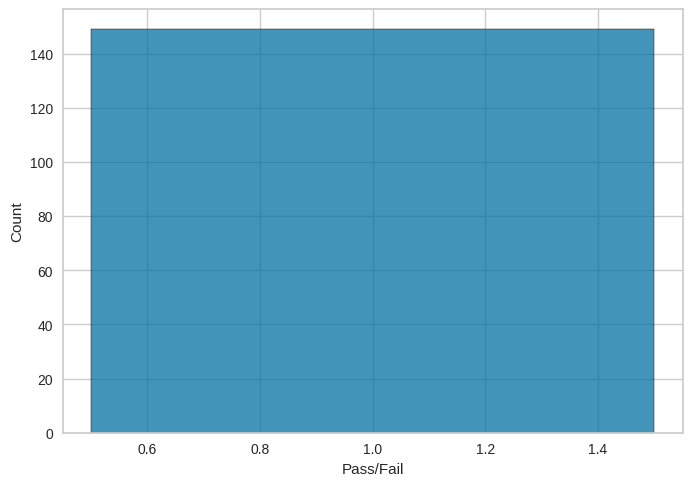

In [148]:
tempo = df[df['Study Hours'] > 6]
nota = tempo[tempo['Previous Exam Score'] > 60]

sns.histplot(data = nota, x='Pass/Fail', palette='deep')
# logo, percebe-se mesmo que todos os alunos com as características de nota anterior > 60 e tempo de estudo > 6h passaram

# Conclusões
Conforme essa base de dados:
- É extremamente improvável que um aluno passe com menos de 5 horas de estudo e/ou nota menor que 60.0;
- Não importa a quantidade de horas de estudo, é muito difícil um aluno passar com a nota anterior menor que 60.0;
- Não importa o valor obtido na nota anterior, se o(a) aluno(a) estudou menos que 4.5 horas, provavelmente ele(a) não será aprovado(a);
- Estudar mais que 6 horas **e** ter uma nota anterior maior que 60.0 é uma garantia de que muito provavelmente o(a) estudante será aprovado(a).